In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

In [15]:
from typing import List, Tuple
import torch
import hydra
import omegaconf
import numpy as np
from omegaconf import DictConfig
from pytorch_lightning import LightningDataModule, LightningModule, Trainer
from pytorch_lightning.loggers import Logger

# pyrootutils.setup_root(__file__, indicator=".project-root", pythonpath=True)

import src.utils.default as utils
import matplotlib.pyplot as plt
torch.set_float32_matmul_precision('medium')

In [3]:
from dotenv import load_dotenv

load_dotenv(Path.cwd().parent/'.env')

True

In [4]:
log = utils.get_pylogger(__name__)

EVAL_PATH = '../logs/test_folds/runs/2023-02-17_16-42-56/.hydra'
CHKPT_PATH = '/mrhome/vladyslavz/git/central-sulcus-analysis/logs/test_folds/runs/2023-02-17_16-42-56/checkpoints/epoch_000.ckpt'

device = 'cuda:0'

In [5]:
cfg = omegaconf.OmegaConf.load(EVAL_PATH + '/config.yaml')

In [6]:
cfg.ckpt_path = CHKPT_PATH

log.info(f"Instantiating datamodule <{cfg.data._target_}>")
datamodule: LightningDataModule = hydra.utils.instantiate(cfg.data)

log.info(f"Instantiating model <{cfg.model._target_}>")
model: LightningModule = hydra.utils.instantiate(cfg.model).to(device)

# log.info("Instantiating loggers...")
# logger: List[Logger] = utils.instantiate_loggers(cfg.get("logger"))

log.info(f"Instantiating trainer <{cfg.trainer._target_}>")
trainer: Trainer = Trainer(gpus=1, max_epochs=1, logger=False)


2023-02-17 16:52:06,132 - Instantiating trainer <pytorch_lightning.Trainer>


Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /mrhome/vladyslavz/anaconda3/envs/css/lib/python3.10 ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


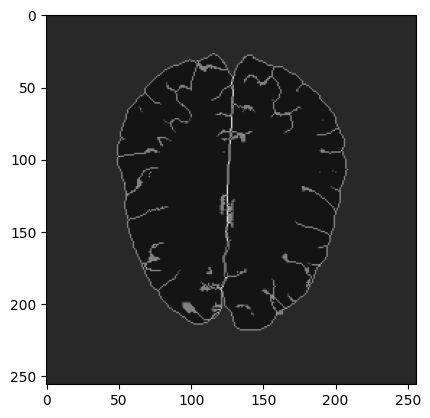

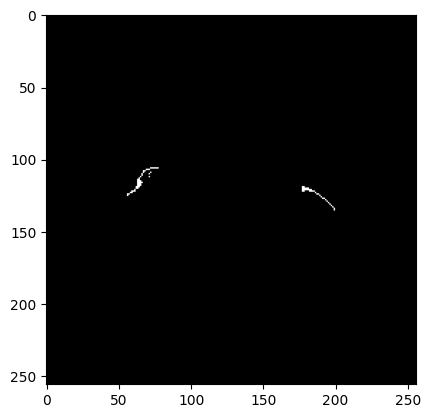

In [7]:
for batch in datamodule.val_dataloader():
    image = batch['image']
    target = batch['target']
plt.imshow(image[0, 0, 80, :, :], cmap='gray')
plt.show()
plt.imshow(target[0, 0, 80, :, :], cmap='gray')
plt.show()

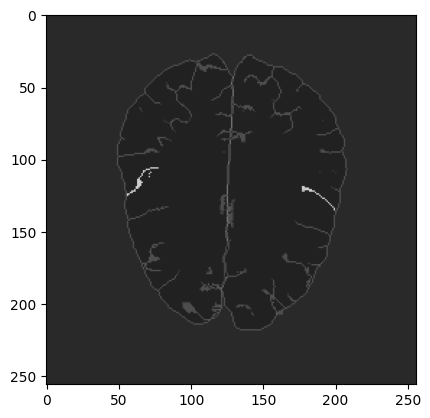

In [8]:
plt.imshow(image[0, 0, 80, :, :], cmap='gray', alpha=0.8)
# plt.show()
plt.imshow(target[0, 0, 80, :, :], cmap='gray', alpha=0.5)
plt.show()

In [9]:
# make prediction
with torch.no_grad():
    pred_proba = model(image.to(device))


In [16]:
pred = pred_proba.cpu().numpy()
pred = np.argmax((pred[0, :, : :, :]), axis=0)

plt.imshow(pred[80, :, :], cmap='gray')
plt.show()
plt.imshow(pred[80, :, :], cmap='gray')